# Visualizing with the `Altair`
***

In [1]:
%matplotlib inline

# standard
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# I've got style,
# miles and miles
import seaborn as sns
sns.set()
sns.set_context('notebook', font_scale=1.5)
cp = sns.color_palette()

In [2]:
from altair import *

<br/>

### Thing 1: Line Chart (with many lines)
***

In [8]:
ts = pd.read_csv('data/ts.csv')

# casting to datetime is important for
# ensuring plots "just work"
ts = ts.assign(dt = pd.to_datetime(ts.dt))
ts.head()

,dt,kind,value
0,2000-01-01,A,1.442521
1,2000-01-02,A,1.981290
2,2000-01-03,A,1.586494
3,2000-01-04,A,1.378969
4,2000-01-05,A,-0.277937


In [9]:
# in matplotlib-land, the notion of a "tidy"
# dataframe matters not
dfp = ts.pivot(index='dt', columns='kind', values='value')
dfp.head()

kind,A,B,C,D
dt,,,,
2000-01-01,1.442521,1.808741,0.437415,0.096980
2000-01-02,1.981290,2.277020,0.706127,-1.523108
2000-01-03,1.586494,3.474392,1.358063,-3.100735
2000-01-04,1.378969,2.906132,0.262223,-2.660599
2000-01-05,-0.277937,3.489553,0.796743,-3.417402


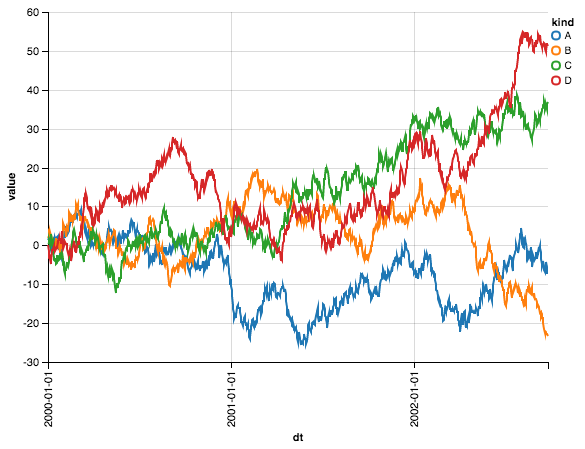

In [10]:
c = Chart(ts).mark_line().encode(
    x='dt',
    y='value',
    color='kind'
)
c

In [12]:
c.to_dict()

{'data': {'values': [{'dt': '2000-01-01', 'kind': 'A', 'value': 1.44252100014},
   {'dt': '2000-01-02', 'kind': 'A', 'value': 1.9812895456400001},
   {'dt': '2000-01-03', 'kind': 'A', 'value': 1.5864936129499998},
   {'dt': '2000-01-04', 'kind': 'A', 'value': 1.3789689089700001},
   {'dt': '2000-01-05', 'kind': 'A', 'value': -0.2779369373},
   {'dt': '2000-01-06', 'kind': 'A', 'value': -1.31733859467},
   {'dt': '2000-01-07', 'kind': 'A', 'value': -0.8644774928260001},
   {'dt': '2000-01-08', 'kind': 'A', 'value': -0.30338923667},
   {'dt': '2000-01-09', 'kind': 'A', 'value': 0.0216723790868},
   {'dt': '2000-01-10', 'kind': 'A', 'value': -0.239886816171},
   {'dt': '2000-01-11', 'kind': 'A', 'value': -0.144826217045},
   {'dt': '2000-01-12', 'kind': 'A', 'value': 0.802032313774},
   {'dt': '2000-01-13', 'kind': 'A', 'value': 1.2733918971},
   {'dt': '2000-01-14', 'kind': 'A', 'value': 0.9388131911830001},
   {'dt': '2000-01-15', 'kind': 'A', 'value': 1.83522553976},
   {'dt': '2000-01

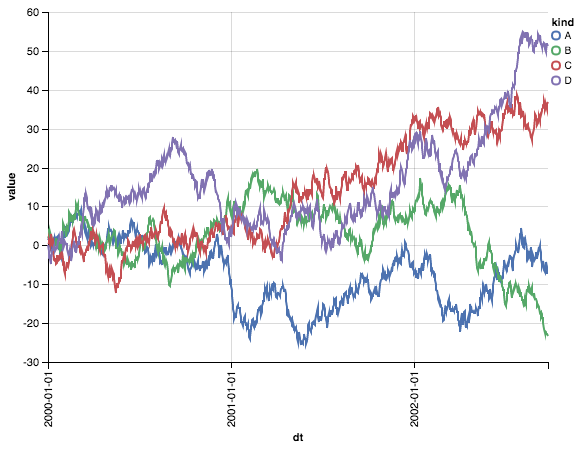

In [57]:
c = Chart(ts).mark_line().encode(
    x='dt',
    y='value',
    color=Color('kind', scale=Scale(range=cp.as_hex()))
)
c

<br/>

### Thing 2: Scatter
***

In [7]:
df = pd.read_csv('data/iris.csv')
df.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


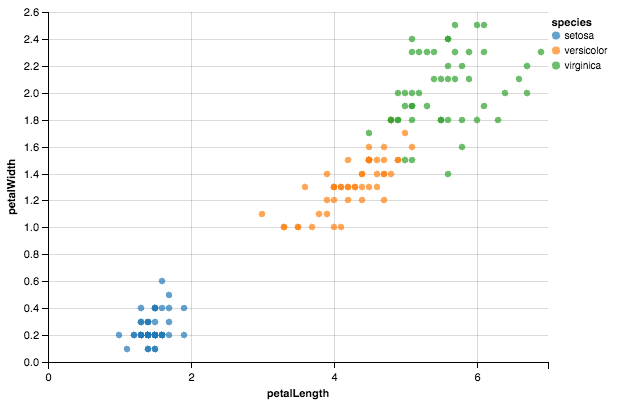

In [8]:
c = Chart(df).mark_point(filled=True).encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)
c

<br/>

### Thing 3: Trellising the Above
***

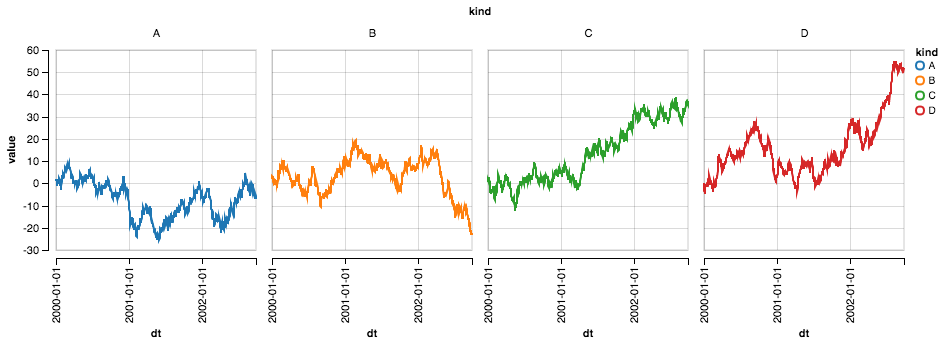

In [9]:
c = Chart(ts).mark_line().encode(
    x='dt',
    y='value',
    color='kind',
    column='kind'
)
c.configure_cell(height=200, width=200)

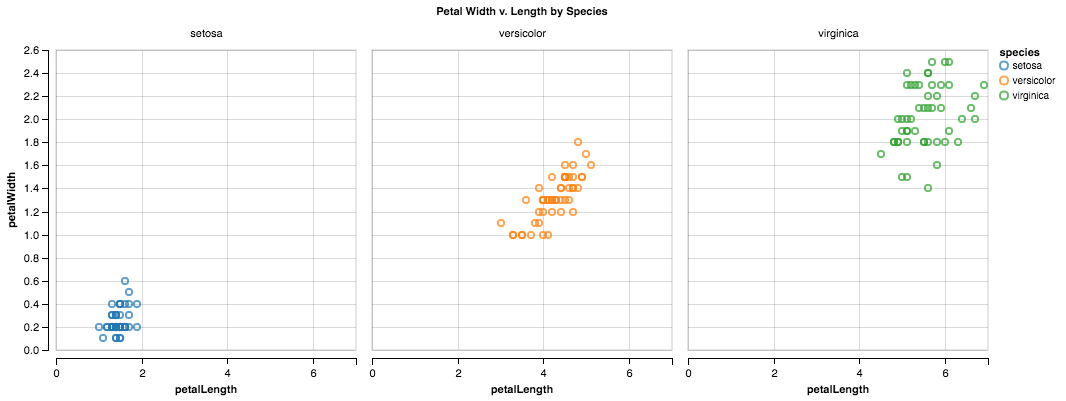

In [10]:
c = Chart(df).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species',
    column=Column('species',
                  title='Petal Width v. Length by Species')
)
c.configure_cell(height=300, width=300)

In [11]:
tmp_n = df.shape[0] - df.shape[0]/2

df['random_factor'] = (np.\
                         random.\
                         permutation(['A'] * tmp_n +
                                     ['B'] * (df.shape[0] - tmp_n)))
df.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species,random_factor
0,1.4,0.2,5.1,3.5,setosa,B
1,1.4,0.2,4.9,3.0,setosa,A
2,1.3,0.2,4.7,3.2,setosa,A
3,1.5,0.2,4.6,3.1,setosa,B
4,1.4,0.2,5.0,3.6,setosa,B


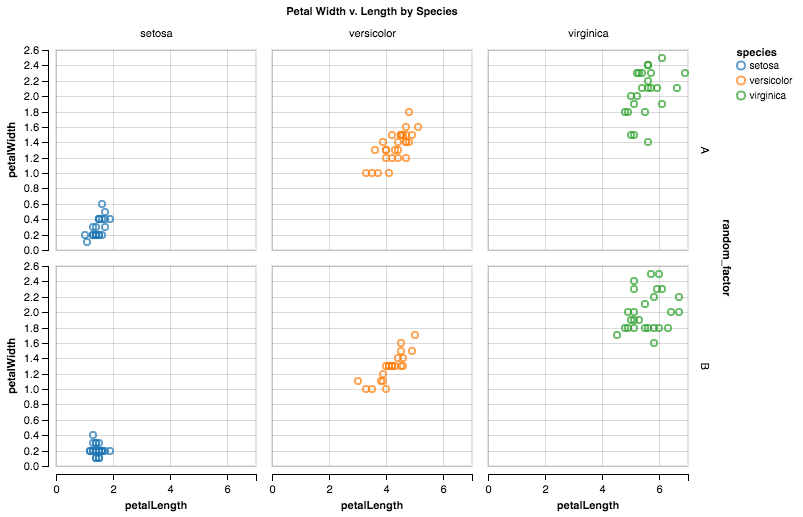

In [12]:
c = Chart(df).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species',
    column=Column('species',
                  title='Petal Width v. Length by Species'),
    row='random_factor'
)
c.configure_cell(height=200, width=200)

<br/>

### Thing 4: Visualizing Distributions (Boxplot and Histogram)
***

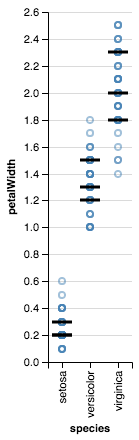

In [49]:
# please note: this code is super speculative -- I'm
# assuming there's a better way to do this and I just
# don't know it

c = Chart(df).mark_point(opacity=.5).encode(
    x='species',
    y='petalWidth'
)

c25 = Chart(df).mark_tick(tickThickness=3.0,
                          tickSize=20.0,
                          color='r').encode(
    x='species',
    y='q1(petalWidth)'
)
c50 = Chart(df).mark_tick(tickThickness=3.0,
                          tickSize=20.0,
                          color='r').encode(
    x='species',
    y='median(petalWidth)'
)
c75 = Chart(df).mark_tick(tickThickness=3.0,
                          tickSize=20.0,
                          color='r').encode(
    x='species',
    y='q3(petalWidth)'
)

LayeredChart(data=df, layers=[c, c25, c50, c75])

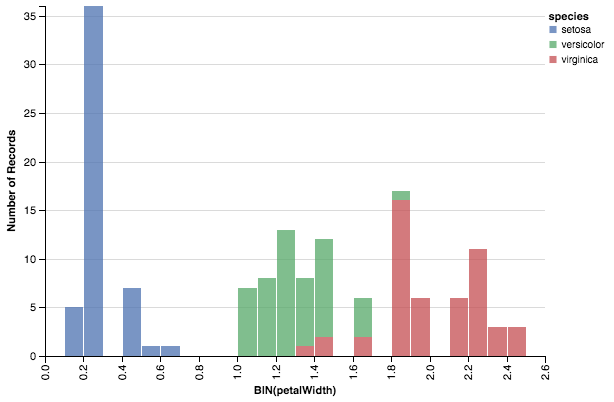

In [50]:
c = Chart(df).mark_bar(opacity=.75).encode(
    x=X('petalWidth', bin=Bin(maxbins=30)),
    y='count(*)',
    color=Color('species', scale=Scale(range=cp.as_hex()))
)
c

<br/>

### Thing 5: Bar Chart
***

In [3]:
df = pd.read_csv('data/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
dfg = df.groupby(['survived', 'pclass']).agg({'fare': 'mean'})
dfg

fare
survived pclass           
0        1       64.684008
         2       19.412328
         3       13.669364
1        1       95.608029
         2       22.055700
         3       13.694887

In [5]:
died = dfg.loc[0, :]
survived = dfg.loc[1, :]

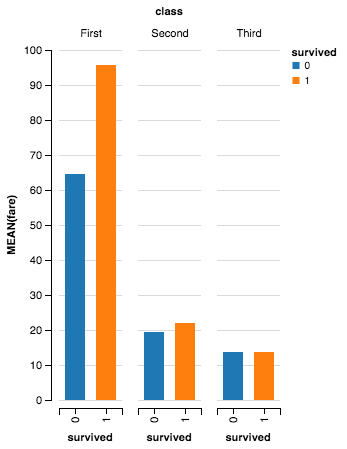

In [6]:
c = Chart(df).mark_bar().encode(
    x='survived:N',
    y='mean(fare)',
    color='survived:N',
    column='class')
c.configure(
    facet=FacetConfig(cell=CellConfig(strokeWidth=0, height=250))
)

In [7]:
c.to_dict()

{'config': {'facet': {'cell': {'height': 250.0, 'strokeWidth': 0.0}}},
 'data': {'values': [{'adult_male': True,
    'age': 22.0,
    'alive': 'no',
    'alone': False,
    'class': 'Third',
    'deck': nan,
    'embark_town': 'Southampton',
    'embarked': 'S',
    'fare': 7.25,
    'parch': 0,
    'pclass': 3,
    'sex': 'male',
    'sibsp': 1,
    'survived': 0,
    'who': 'man'},
   {'adult_male': False,
    'age': 38.0,
    'alive': 'yes',
    'alone': False,
    'class': 'First',
    'deck': 'C',
    'embark_town': 'Cherbourg',
    'embarked': 'C',
    'fare': 71.2833,
    'parch': 0,
    'pclass': 1,
    'sex': 'female',
    'sibsp': 1,
    'survived': 1,
    'who': 'woman'},
   {'adult_male': False,
    'age': 26.0,
    'alive': 'yes',
    'alone': True,
    'class': 'Third',
    'deck': nan,
    'embark_town': 'Southampton',
    'embarked': 'S',
    'fare': 7.925,
    'parch': 0,
    'pclass': 3,
    'sex': 'female',
    'sibsp': 0,
    'survived': 1,
    'who': 'woman'},
   {